# Análise exploratória

* verifique qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas.
* Realizar uma análise em relação à visualização gerada.
* gere uma tabela com a quantidade total de exemplares emprestados por mês e descubra quais meses são os que possuem a maior quantidade de empréstimos realizados. Plote um gráfico de linhas.
* Traga suas análises em relação a quais meses poderiam ser as melhores opções(para férias dos colaborares).
* verifique quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro.
* Plote um gráfico de barras e analise quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [42]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [43]:
# lendo o dataset

df = pd.read_parquet('../datasets/dados_tratados/dados_emprestimos_tratados.parquet')
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao_cdu
0,9405484,2011010806,2017-01-13 07:22:40.736,2017-01-02 08:01:14.113,2017-01-30 07:05:05,2014035816,ALUNO DE GRADUAÇÃO,915480,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,689,Ciências aplicadas
1,9405492,2010040100,2017-01-31 07:31:36.902,2017-01-02 08:29:46.722,2017-02-21 13:16:33,20161011168,ALUNO DE PÓS-GRADUAÇÃO,1051275,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,651,Ciências aplicadas
2,9405496,2013105705,2017-01-31 07:31:36.843,2017-01-02 08:29:46.794,2017-02-21 13:15:46,20161011168,ALUNO DE PÓS-GRADUAÇÃO,1097159,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,380,Ciências sociais
3,9405504,H004983,2017-01-31 07:31:36.786,2017-01-02 08:46:42.991,2017-02-22 16:10:28,20161011168,ALUNO DE PÓS-GRADUAÇÃO,132715,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,635,Ciências aplicadas
4,9405508,H011333,2017-01-31 07:31:36.658,2017-01-02 08:46:43.400,2017-02-22 16:10:40,20161011168,ALUNO DE PÓS-GRADUAÇÃO,180475,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,632,Ciências aplicadas


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  classificacao_cdu     object        
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 205.6+ MB


In [45]:
# quantidade total de exemplares emprestados por cada ano
years = df['data_emprestimo'].dt.year

df_years_loans = df.groupby(years)['codigo_barras'].count().reset_index()
df_years_loans.columns = ['ano_emprestimo', 'quantidade_emprestimos']
df_years_loans.head()

,ano_emprestimo,quantidade_emprestimos
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189


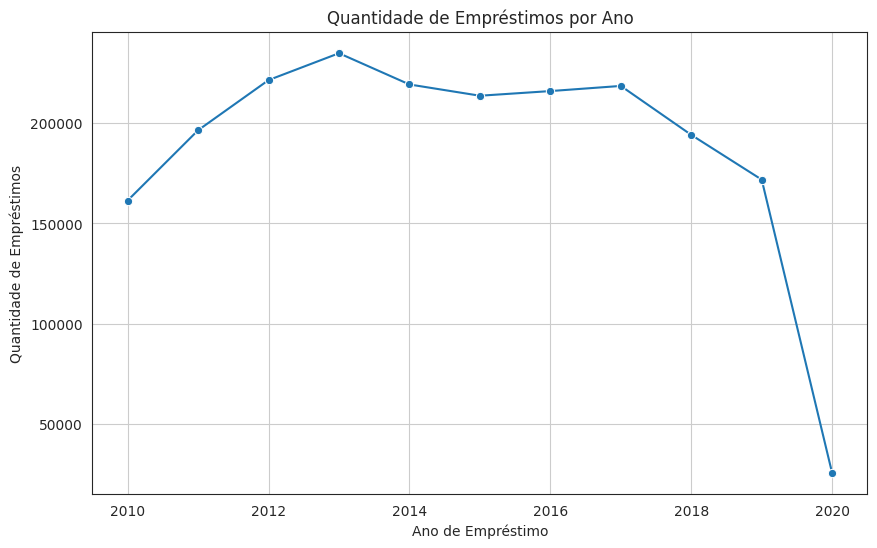

In [46]:
# Gráfico de linha da quantidade de empréstimos por ano
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_years_loans, x='ano_emprestimo', y='quantidade_emprestimos', marker='o')
plt.title('Quantidade de Empréstimos por Ano')
plt.xlabel('Ano de Empréstimo')
plt.ylabel('Quantidade de Empréstimos')
plt.grid()
plt.show()

### Análise do gráfico

#### De acordo com o gráfico plotado, é possível perceber uma redução drásticas do números de exemplares emprestado no ano de 2020. Provavelmente ocasionado pelo lock down da pandemia de COVID 19

In [47]:
# quantidade total de exemplares emprestados por mês

months = df['data_emprestimo'].dt.month

df_months_loans = df.groupby(months)['codigo_barras'].count().reset_index()
df_months_loans.columns = ['mes_emprestimo', 'quantidade_emprestimos']
#df_months_loans['mes_emprestimo'] = df_months_loans['mes_emprestimo'].dt.to_timestamp()
months_mapping = {
    1: 'Janeiro',
    2: 'Fevereiro', 
    3: 'Março', 
    4: 'Abril',
    5: 'Maio', 
    6: 'Junho', 
    7: 'Julho', 
    8: 'Agosto',
    9: 'Setembro', 
    10: 'Outubro', 
    11: 'Novembro', 
    12: 'Dezembro'
}

df_months_loans['mes_emprestimo'] = df_months_loans['mes_emprestimo'].map(months_mapping)
df_months_loans.head()

,mes_emprestimo,quantidade_emprestimos
0,Janeiro,67514
1,Fevereiro,210200
2,Março,252185
3,Abril,208725
4,Maio,202530


In [48]:
# Quantidade de empréstimos por mês em ordem decrescente

df_months_loans_sorted = df_months_loans.sort_values('quantidade_emprestimos', ascending=False)
df_months_loans_sorted


,mes_emprestimo,quantidade_emprestimos
2,Março,252185
7,Agosto,232793
1,Fevereiro,210200
3,Abril,208725
8,Setembro,208234
4,Maio,202530
9,Outubro,188410
10,Novembro,164222
5,Junho,138123
6,Julho,123790


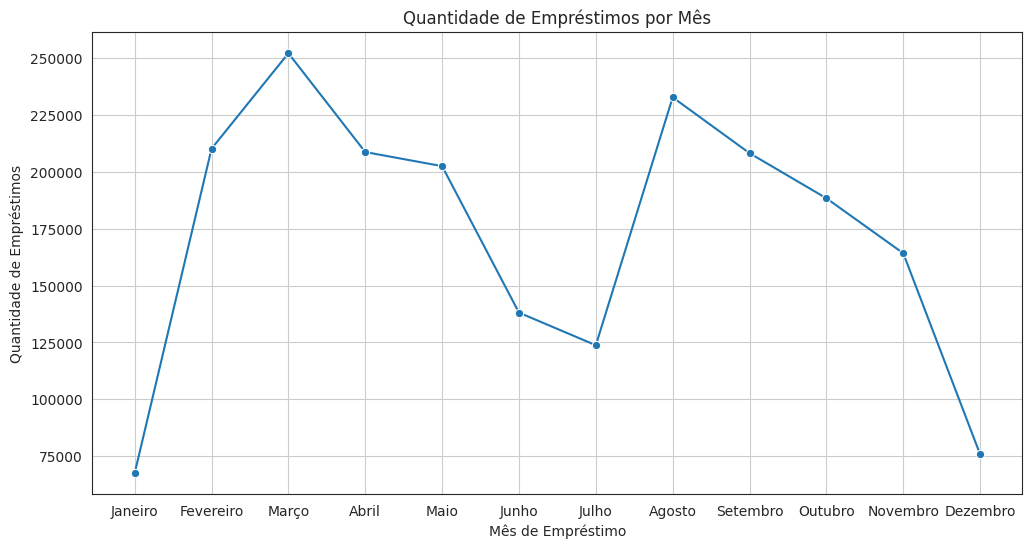

In [49]:
# Gráfico de linha da quantidade de empréstimos por mês
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months_loans, x='mes_emprestimo', y='quantidade_emprestimos', marker='o')
plt.title('Quantidade de Empréstimos por Mês')
plt.xlabel('Mês de Empréstimo')
plt.ylabel('Quantidade de Empréstimos')
plt.grid()
plt.show()

#### Análise da dinámica de empréstimos de exemplares, por mês.

Considerando o gráfico e tabela da distribuição mensal de empréstimos, percebe-se que os meses de maior demanda são Agosto e Março, e os de menores demandas são Janeiro e Fevereiro

In [50]:
# Empréstimo por hora do dia

hours_loans = df.groupby(df['data_emprestimo'].dt.hour)['codigo_barras'].count().reset_index()
hours_loans.columns = ['hora_emprestimo', 'quantidade_emprestimos']
hours_loans

,hora_emprestimo,quantidade_emprestimos
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


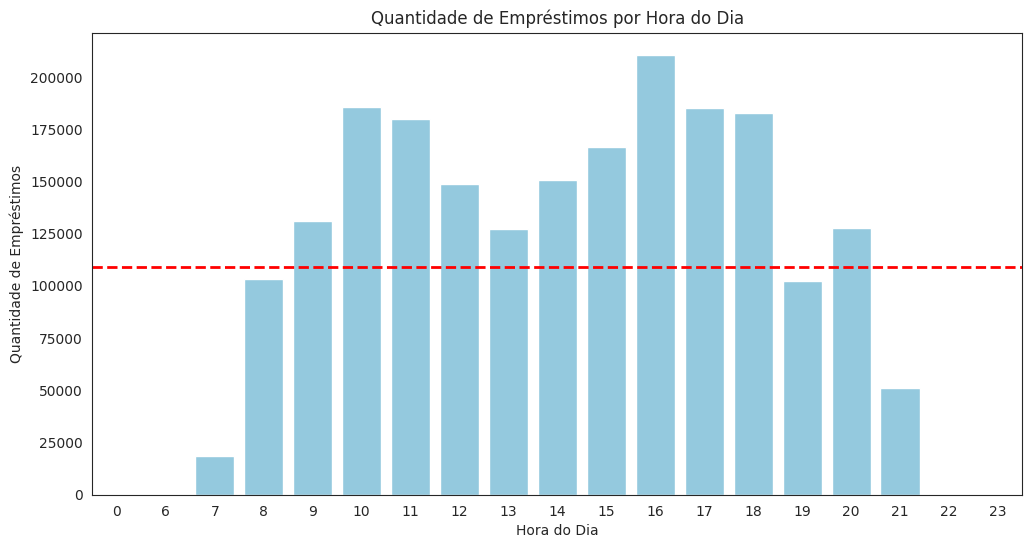

In [51]:
# Gráfico de barra da quantidade de empréstimos por hora do dia
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=hours_loans, x='hora_emprestimo', y='quantidade_emprestimos', color='skyblue')
plt.title('Quantidade de Empréstimos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Empréstimos')

# linha horizontal na média
# calcula média
mean_val = hours_loans['quantidade_emprestimos'].mean()
ax.axhline(mean_val, color='red', linestyle='--', linewidth=2)

plt.show()

#### Análise dos número de empréstimo ao longo do dia
Considerando os dados apresentado, a linha vermelha na horizontal representa a média do número de empréstimos realizados no dia. Dessa forma é recomendável que sejam atribuídas outras atividades além do atendimento ao público, antes das 9h e após as 18h

## Quarto dia

* Explorar dados das variáveis categóricas:
    - Tipo de vínculo
    - Coleção
    - Biblioteca
    - Classificação geral da CDU
* Gerar uma tabela de frequência e com o percentual para cada variável.
* criar uma função que gere a tabela com os valores.
* Analisar os resultados dos  questionamentos realizados

#### Questionamentos a serem respondidos:

* Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?
* Quais coleções são mais emprestadas?
* Quais são as bibliotecas com mais ou menos quantidade de empréstimos?
* De quais temas da CDU são os exemplares emprestados?


In [52]:
df

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao_cdu
0,9405484,2011010806,2017-01-13 07:22:40.736,2017-01-02 08:01:14.113,2017-01-30 07:05:05,2014035816,ALUNO DE GRADUAÇÃO,915480,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,689,Ciências aplicadas
1,9405492,2010040100,2017-01-31 07:31:36.902,2017-01-02 08:29:46.722,2017-02-21 13:16:33,20161011168,ALUNO DE PÓS-GRADUAÇÃO,1051275,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,651,Ciências aplicadas
2,9405496,2013105705,2017-01-31 07:31:36.843,2017-01-02 08:29:46.794,2017-02-21 13:15:46,20161011168,ALUNO DE PÓS-GRADUAÇÃO,1097159,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,380,Ciências sociais
3,9405504,H004983,2017-01-31 07:31:36.786,2017-01-02 08:46:42.991,2017-02-22 16:10:28,20161011168,ALUNO DE PÓS-GRADUAÇÃO,132715,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,635,Ciências aplicadas
4,9405508,H011333,2017-01-31 07:31:36.658,2017-01-02 08:46:43.400,2017-02-22 16:10:40,20161011168,ALUNO DE PÓS-GRADUAÇÃO,180475,Acervo Circulante,Biblioteca Setorial do Centro de Ciências Huma...,REGULAR,632,Ciências aplicadas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,799095,2007024245,NaT,2010-06-30 21:32:14.476,2010-07-02 21:16:43,200711717,ALUNO DE GRADUAÇÃO,223127,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,655,Ciências aplicadas
2072518,799096,L197893,NaT,2010-06-30 21:32:14.618,2010-07-07 19:25:13,200711717,ALUNO DE GRADUAÇÃO,178672,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,639,Ciências aplicadas
2072519,799097,L194357,NaT,2010-06-30 21:32:40.359,2010-07-01 16:51:54,2009008642,ALUNO DE GRADUAÇÃO,164543,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,657,Ciências aplicadas
2072520,799098,2010002179,2010-07-15 08:20:13.242,2010-06-30 21:40:41.356,2010-07-30 11:10:38,200418572,ALUNO DE GRADUAÇÃO,767241,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,649,Ciências aplicadas


In [53]:
# Função para criar tabela de frequência e percentual

def create_table_frequency_percentage(data_frame, column_name):
    frequency = data_frame[column_name].value_counts()
    percentage = data_frame[column_name].value_counts(normalize=True) * 100
    
    df_result = pd.DataFrame({
        column_name: frequency.index,
        'quantidade_emprestimos': frequency.values,
        'percentual_emprestimos': percentage.values
    })
    
    return df_result

##### Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?



In [54]:
# tabela de frequência e percentual para o tipo de vínculo do usuário

create_table_frequency_percentage(df, 'tipo_vinculo_usuario')

,tipo_vinculo_usuario,quantidade_emprestimos,percentual_emprestimos
0,ALUNO DE GRADUAÇÃO,1612324,77.795266
1,ALUNO DE PÓS-GRADUAÇÃO,302541,14.597722
2,DOCENTE,70981,3.424861
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.552891
4,ALUNO MÉDIO/TÉCNICO,28029,1.352410
5,DOCENTE EXTERNO,23949,1.155549
6,USUÁRIO EXTERNO,2509,0.121060
7,OUTROS,5,0.000241


Mais de $\frac{3}{4}$ dos usuários das bibliotecas são alunos de graduação

##### Quais coleções são mais emprestadas?

In [55]:
# tabela de frequência e percentual para o tipo coleção do exemplar

create_table_frequency_percentage(df, 'colecao')

,colecao,quantidade_emprestimos,percentual_emprestimos
0,Acervo Circulante,2053120,99.063846
1,Multimeios,7954,0.383784
2,Monografias,4021,0.194015
3,Dissertações,2406,0.116090
4,Obras de Referência,1954,0.094281
5,Publicações de Autores do RN,866,0.041785
6,Publicações da UFRN,764,0.036863
7,Teses,714,0.034451
8,Folhetos,271,0.013076
9,Necessidades Educacionais Específicas,130,0.006273


Quase que a totalidade das coleções emprestadas são acervo circulante

##### Quais são as bibliotecas com mais ou menos quantidade de empréstimos?

In [56]:
# tabela de frquência e percentual para biblioteca de empréstimo

create_table_frequency_percentage(df, 'biblioteca')

,biblioteca,quantidade_emprestimos,percentual_emprestimos
0,Biblioteca Central Zila Mamede,1426122,68.810946
1,Biblioteca Setorial do Centro Ciências da Saúd...,118614,5.723172
2,Biblioteca Setorial da Faculdade de Ciências d...,77609,3.744665
3,Biblioteca Setorial Prof. Alberto Moreira Camp...,66447,3.206094
4,Biblioteca Setorial Profª. Maria Lúcia da Cost...,61478,2.966338
5,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,46040,2.221448
6,Biblioteca Setorial do Centro de Ciências Huma...,40744,1.965914
7,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,32097,1.548693
8,Biblioteca Setorial Profª. Maria José Mamede G...,29089,1.403556
9,Biblioteca Setorial Prof. Rodolfo Helinski - E...,27219,1.313327


A principal biblioteca da UFRN é a Biblioteca Central Zila Mamede, com quase 70% dos empréstimos do período analisado

##### De quais temas da CDU são os exemplares emprestados?

In [57]:
# tabela de frequência e percentual para classificação cdu

create_table_frequency_percentage(df, 'classificacao_cdu')

,classificacao_cdu,quantidade_emprestimos,percentual_emprestimos
0,Ciências aplicadas,1425473,68.779632
1,Ciências sociais,369536,17.830257
2,Matemática e ciências naturais,68744,3.316925
3,Generalidades. Ciência e conhecimento,62521,3.016663
4,Religião,62295,3.005758
5,Filosofia e psicologia,60563,2.922189
6,,7989,0.385472
7,Belas artes,7911,0.381709
8,Linguagem. Linguística. Literatura,7490,0.361395


Os temas mais emprestados são das classificações Ciências aplicadas e Ciências sociais

## Quinto Dia

* Plotar um gráfico para cada tipo de usuário. Fazer um boxplots para cada ano
* Avaliar dentre os alunos de graduação e pós graduação a distribuição de empréstimos mensais por ano realizados entre 2010 e 2020 **da coleção que tiver a maior frequência de empréstimos**.


##### Selecionando a coleção com maior frequência de empréstimos

Considerando a tabela gerada na linha 14, a tabela gerada indica que a coleção com maior frequência de empréstimos é *Acervo Circulante*

In [58]:
# tabela de frequência das coleções mais emprestadas, de Alunos de Graduação e de Pós-Graduação
df = pd.read_parquet('../datasets/dados_tratados/dados_emprestimos_tratados.parquet')

df_colecao_grad_pos = df[
                        (df['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO') | 
                        (df['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO') &
                        (df['colecao'] == 'Acervo Circulante')
                        ]

df_colecao_grad_pos = df_colecao_grad_pos[['id_emprestimo','data_emprestimo' ,'tipo_vinculo_usuario']]

df_colecao_grad_pos

,id_emprestimo,data_emprestimo,tipo_vinculo_usuario
0,9405484,2017-01-02 08:01:14.113,ALUNO DE GRADUAÇÃO
1,9405492,2017-01-02 08:29:46.722,ALUNO DE PÓS-GRADUAÇÃO
2,9405496,2017-01-02 08:29:46.794,ALUNO DE PÓS-GRADUAÇÃO
3,9405504,2017-01-02 08:46:42.991,ALUNO DE PÓS-GRADUAÇÃO
4,9405508,2017-01-02 08:46:43.400,ALUNO DE PÓS-GRADUAÇÃO
...,...,...,...
2072517,799095,2010-06-30 21:32:14.476,ALUNO DE GRADUAÇÃO
2072518,799096,2010-06-30 21:32:14.618,ALUNO DE GRADUAÇÃO
2072519,799097,2010-06-30 21:32:40.359,ALUNO DE GRADUAÇÃO
2072520,799098,2010-06-30 21:40:41.356,ALUNO DE GRADUAÇÃO


In [59]:
# extraindo o ano e mês da coluna data_emprestimo

df_colecao_grad_pos.loc[:, 'ano_emprestimo'] = df_colecao_grad_pos['data_emprestimo'].dt.year
df_colecao_grad_pos.loc[:, 'mes_emprestimo'] = df_colecao_grad_pos['data_emprestimo'].dt.month
df_colecao_grad_pos = df_colecao_grad_pos[['id_emprestimo', 'tipo_vinculo_usuario', 'ano_emprestimo', 'mes_emprestimo']]

months_mapping = {
    1: 'Janeiro',
    2: 'Fevereiro', 
    3: 'Março', 
    4: 'Abril',
    5: 'Maio', 
    6: 'Junho', 
    7: 'Julho', 
    8: 'Agosto',
    9: 'Setembro', 
    10: 'Outubro', 
    11: 'Novembro', 
    12: 'Dezembro'
}
df_grad_pos = df_colecao_grad_pos.groupby(['mes_emprestimo', 'ano_emprestimo', 'tipo_vinculo_usuario'])['id_emprestimo'].count().reset_index()
df_grad_pos.columns = ['mes', 'ano', 'tipo_vinculo_usuario', 'emprestimos']
df_grad_pos['mes'] = df_grad_pos['mes'].map(months_mapping)
df_grad_pos

,mes,ano,tipo_vinculo_usuario,emprestimos
0,Janeiro,2010,ALUNO DE GRADUAÇÃO,3012
1,Janeiro,2010,ALUNO DE PÓS-GRADUAÇÃO,1105
2,Janeiro,2011,ALUNO DE GRADUAÇÃO,821
3,Janeiro,2011,ALUNO DE PÓS-GRADUAÇÃO,465
4,Janeiro,2012,ALUNO DE GRADUAÇÃO,5005
...,...,...,...,...
242,Dezembro,2017,ALUNO DE PÓS-GRADUAÇÃO,1582
243,Dezembro,2018,ALUNO DE GRADUAÇÃO,3936
244,Dezembro,2018,ALUNO DE PÓS-GRADUAÇÃO,1382
245,Dezembro,2019,ALUNO DE GRADUAÇÃO,2012


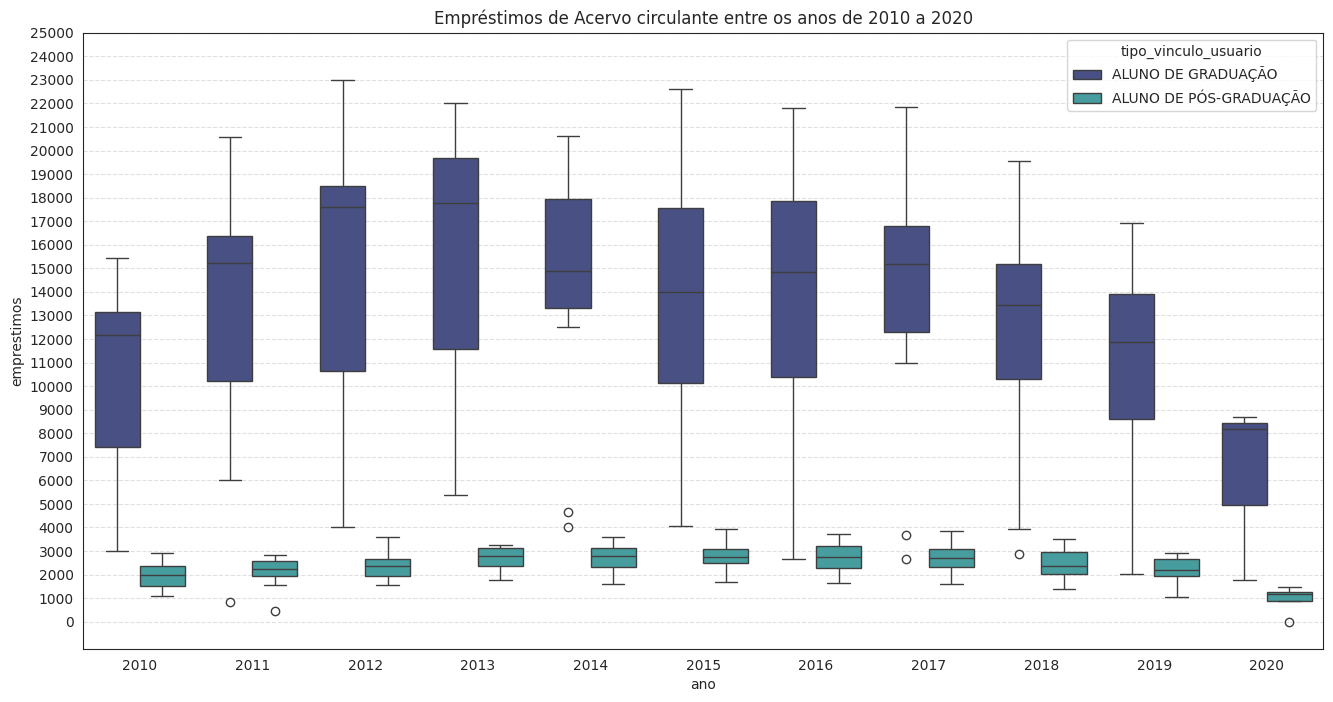

In [ ]:
# gráfico de empréstimos de Acervo circulantes entre os alunos de graduação e pós gradução entre os anos de 2010 e 2020, por ano

plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_grad_pos, x='ano', y='emprestimos', hue='tipo_vinculo_usuario', palette='mako')

# --- DEFININDO AS LINHAS DE 1000 EM 1000 ---
# Pegamos o valor mínimo e máximo arredondados para garantir que a grade cubra tudo
ymin, ymax = ax.get_ylim()
ticks = np.arange(0, np.ceil(ymax/1000)*1000 + 1000, 1000)

ax.set_yticks(ticks)
# Adicionando a grade horizontal manualmente para maior controle
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color='lightgrey')
plt.title("Empréstimos de Acervo circulante entre os anos de 2010 a 2020")
plt.show()

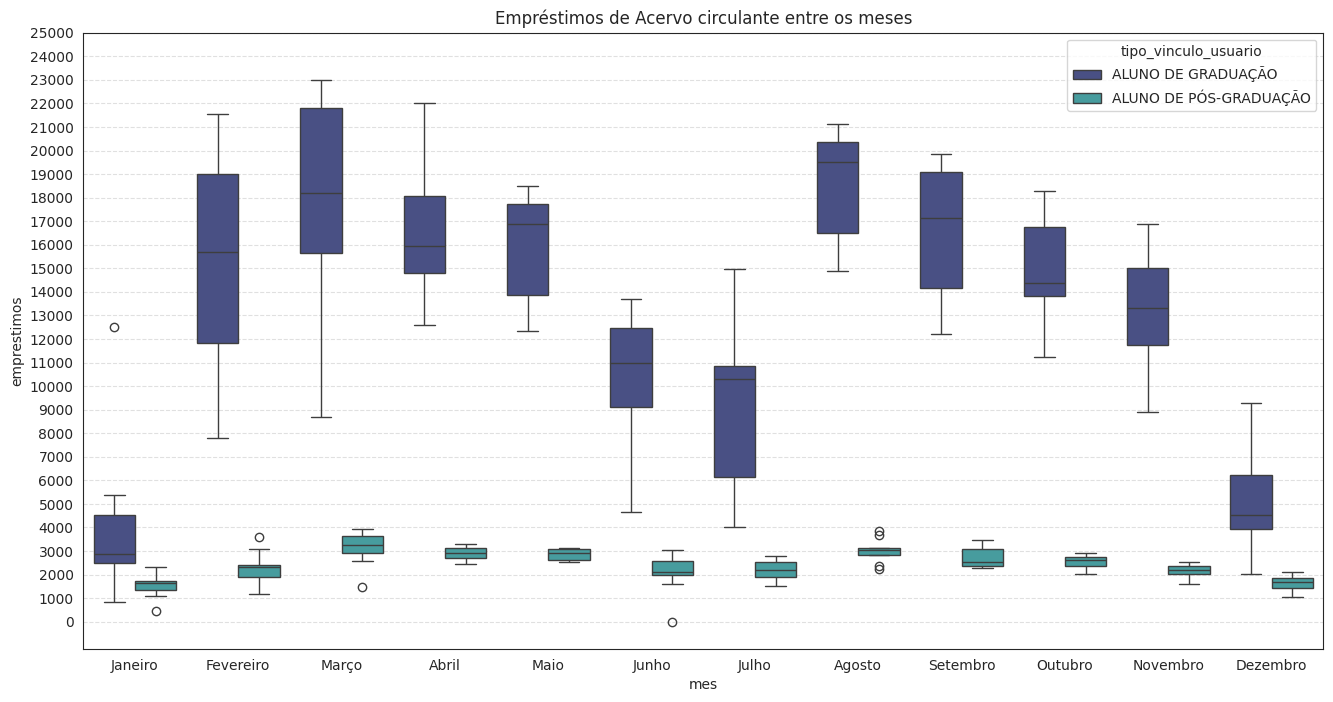

In [64]:
# gráfico de empréstimos de Acervo circulantes entre os alunos de graduação e pós gradução entre os anos de 2010 e 2020, por mês

plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_grad_pos, x='mes', y='emprestimos', hue= 'tipo_vinculo_usuario', palette='mako')

# --- DEFININDO AS LINHAS DE 1000 EM 1000 ---
# Pegamos o valor mínimo e máximo arredondados para garantir que a grade cubra tudo
ymin, ymax = ax.get_ylim()
ticks = np.arange(0, np.ceil(ymax/1000)*1000 + 1000, 1000)

ax.set_yticks(ticks)
# Adicionando a grade horizontal manualmente para maior controle
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color='lightgrey')
plt.title("Empréstimos de Acervo circulante entre os meses")
plt.show()